In [2]:
from bs4 import BeautifulSoup
import requests

# Importar librerías para manipulación y análisis de datos
# -----------------------------------------------------------------------
import pandas as pd

# Importar librerías para procesamiento de texto
# -----------------------------------------------------------------------
import re

In [3]:
# definimos la url de la página de la vamos a sacar datos
url_coches = "https://www.ocasionplus.com/coches-ocasion?type%3DCAR%26sort%3DFECHAOP_DESC%26page%3D2"

# hacemos la request a la página de la que queremos sacar la info
url_coches_llamada = requests.get(url_coches)

# vemos si todo ha ido bien
print("La respuesta de la petición es:", url_coches_llamada.status_code)

La respuesta de la petición es: 200


<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8" class="next-head"/>
  <title class="next-head">
   Coches de segunda mano, ocasión y seminuevos | OcasionPlus
  </title>
  <meta class="next-head" content="4000 coches de ocasión y segunda mano con descuentos de hasta 6000€, la mejor relación calidad-precio garantizada." name="description"/>
  <meta class="next-head" content="noindex, follow, noarchive" name="robots"/>
  <meta class="next-head" content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link class="next-head" href="/static/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link class="next-head" href="/static/favicon/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <link class="next-head" href="/static/favicon/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link class="next-head" href="/static/favicon/favicon-194x194.png" rel="icon" sizes="194x194" type="image/png"/>
  <link class="next-head" href="/static/f
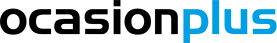

In [4]:
# creamos el objeto BeautifulSoup para poder acceder al contenido solicitado
sopa_coches = BeautifulSoup(url_coches_llamada.content, 'html.parser')

# mostramos por pantalla los resultados del objeto de Beautiful Soup. El método ".prettify()" nos ayuda a visualizar los resultados de una forma más amigable
print(sopa_coches.prettify())

In [5]:
# sacamos los nombres de los coches
lista_nombre_producto = sopa_coches.find_all("h2", {"style": "overflow-x:hidden"})

# mostramos los resultados del método ".find_all()". Como dijimos al inicio este método nos va a devolver una lista
# Si lo exploramos un poco veremos que tenemos una lista de elemento y que tiene muchas cosas, pero si nos fijamos bien tenemos todos los nombres de los coches que tenemos en la página web
print("El resultado del método '.find_all()' es: \n",   lista_nombre_producto)

# es el momento de sacar la información útil del método que hemos usado previamente. Para eso lo primero que vamos a hacer es crearnos una lista donde iremos almacenado los resultados que queremos
nombres_productos = []

# dado que es una lista lo que vamos a hacer es iterar por la lista para poder acceder a cada uno de los elementos
for i in lista_nombre_producto:
    # utilizamos el método ".getText()" para sacar el texto de cada uno de los elementos y lo apendeamos a la lista que hemos creado previamente. 
    nombres_productos.append(i.getText())

print("\n--------------------------\n")

print("Los resultados de extraer el texto de cada uno de los elementos es:\n", nombres_productos)

El resultado del método '.find_all()' es: 
 [<h2 style="overflow-x:hidden">Peugeot 208 BlueHDi 100 Allure (100 CV)</h2>, <h2 style="overflow-x:hidden">Hyundai Kona 1.0 TGDi Klass 4x2 (120 CV)</h2>, <h2 style="overflow-x:hidden">Ford Focus 1.0 Ecoboost MHEV Trend+ (125 CV)</h2>, <h2 style="overflow-x:hidden">Hyundai i20 1.2 MPI (75CV) Essence LE</h2>, <h2 style="overflow-x:hidden">Ford Kuga 1.5 EcoBoost A-S-S 4x2 Titanium (150 CV)</h2>, <h2 style="overflow-x:hidden">Citroen C3 PureTech 110 S&amp;S Shine (110 CV)</h2>, <h2 style="overflow-x:hidden">Peugeot 208 BlueHDi 100 Allure (100 CV)</h2>, <h2 style="overflow-x:hidden">Honda Civic 1.6 i-DTEC Elegance (120 CV)</h2>, <h2 style="overflow-x:hidden">Opel Mokka 1.6 CDTI Excellence 4x2 (136 CV)</h2>, <h2 style="overflow-x:hidden">Mercedes-Benz Clase CLA 220 CDI Urban (170 CV)</h2>, <h2 style="overflow-x:hidden">SEAT Leon 1.5 TSI S&amp;S FR Fast Edition  (150 CV)</h2>, <h2 style="overflow-x:hidden">Honda HR-V 1.5 i-VTEC Elegance CVT (130 CV)

In [6]:
# sacamos los precios originales de los coches
lista_precio_original = sopa_coches.find_all("span", {"class":"jsx-2870186023 priceLast"})

# mostramos los resultados del método ".find_all()". Como dijimos al inicio este método nos va a devolver una lista
# Si lo exploramos un poco veremos que tenemos una lista de elemento y que tiene muchas cosas, pero si nos fijamos bien tenemos todos los nombres de los coches que tenemos en la página web
print("El resultado del método '.find_all()' es: \n",   lista_precio_original)

# es el momento de sacar la información útil del método que hemos usado previamente. Para eso lo primero que vamos a hacer es crearnos una lista donde iremos almacenado los resultados que queremos
precio_original = []

# dado que es una lista lo que vamos a hacer es iterar por la lista para poder acceder a cada uno de los elementos
for i in lista_precio_original:
    # utilizamos el método ".getText()" para sacar el texto de cada uno de los elementos y lo apendeamos a la lista que hemos creado previamente. 
    precio_original.append(i.getText())

print("\n--------------------------\n")

print("Los resultados de extraer el texto de cada uno de los elementos es:\n", precio_original)

El resultado del método '.find_all()' es: 
 [<span class="jsx-2870186023 priceLast">17.200<!-- -->€</span>, <span class="jsx-2870186023 priceLast">15.990<!-- -->€</span>, <span class="jsx-2870186023 priceLast">14.990<!-- -->€</span>, <span class="jsx-2870186023 priceLast">11.990<!-- -->€</span>, <span class="jsx-2870186023 priceLast">16.490<!-- -->€</span>, <span class="jsx-2870186023 priceLast">12.900<!-- -->€</span>, <span class="jsx-2870186023 priceLast">17.200<!-- -->€</span>, <span class="jsx-2870186023 priceLast">14.900<!-- -->€</span>, <span class="jsx-2870186023 priceLast">16.850<!-- -->€</span>, <span class="jsx-2870186023 priceLast">23.990<!-- -->€</span>, <span class="jsx-2870186023 priceLast">19.900<!-- -->€</span>, <span class="jsx-2870186023 priceLast">19.450<!-- -->€</span>, <span class="jsx-2870186023 priceLast">58.500<!-- -->€</span>, <span class="jsx-2870186023 priceLast">23.350<!-- -->€</span>, <span class="jsx-2870186023 priceLast">15.390<!-- -->€</span>, <span clas